# How Many Cooks? Inferring Design Intent from Spatial Layout

Justin Yang <br>
justin.yang@stanford.edu <br>
Psych 254a Final Project Writeup <br>
June 11, 2025

## Setup environment

In [ ]:
import os 
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

experiment_name = '254a_class_pilot'
iteration_name = 'pilot_local_2'

project_dir = os.path.abspath('../../')
data_dir = os.path.join(project_dir, 'data')
model_dir = os.path.join(data_dir, 'models')
behavior_dir = os.path.join(data_dir, 'behavioral_results', experiment_name, iteration_name)
experiment_dir = os.path.join(project_dir, 'docs', '254a_class_pilot')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [2]:
model_df = pd.read_csv(os.path.join(model_dir, 'model_results.csv'))
session_df = pd.read_csv(os.path.join(behavior_dir, 'session_data.csv'))
trial_df = pd.read_csv(os.path.join(behavior_dir, 'trial_data.csv'))

model_df['congruent_full'] = model_df.apply(lambda x: (
    (x.intended_recipe == x.model_recipe) or ('either' in x.intended_recipe)) and \
    ((x.intended_num_agents == x.model_num_agents) or ('either' in x.intended_num_agents))
                            , axis=1)
model_df['congruent_full'] = model_df.congruent_full.apply(lambda x: 'congruent' if x else 'incongruent')

## Introduction


Humans construct the environments they live in. From the organization of our homes to the layout of entire cities, our surroundings reflect purposeful design aimed at facilitating both personal and collective goals (Alexander 1977). For example, a professional chef preparing for the dinner rush may reorganize their kitchen to maximize throughput—doubling prep stations, streamlining ingredient flow, and clearing wide lanes for a rush. The same room, rearranged for a quiet solo brunch, might instead cluster tools around a single workspace to minimize reach and cleanup. How do we design our enviornments to faciliate our goals, and how we, in turn, take advantage of this intentional design to guide our actions?

Purposeful layouts do more than reduce motor effort; they shape thought and coordination. Work in philosophy and cognitive ecology has suggested that people routinely alter their surroundings to offload memory, highlight temporal structure, and signal social roles (Kirsh 1995; Kirsh & Maglio 1994; Forsblad 2016). 
A well-tuned kitchen not only speeds chopping; it externalizes the recipe’s sequence, constrains turn-taking, and silently tells a second cook where to stand. Layouts therefore become legible evidence of intent: observers can inspect a space and ask, What goal was this organized to achieve?

This idea echoes insights from work examining how teachers and students engage in pragmatic reasoning in pedagogical settings. Teachers selectively demonstrate examples that efficiently reveal a concept to learners. Learners, in turn, interpret sparse evidence through a pragmatic lens, reasoning that whatever the teacher chose to show was chosen because it best illustrates the underlying concept (Shafto et al. 2014; Vélez et al. 2023). Bayesian-teaching models formalize this cooperative exchange: a pedagogical agent chooses data 
$d$ to maximize the learner’s posterior $p(h∣d)$, while the learner inverses that same model to recover the intended hypothesis $h$. By conditioning on the teacher's intention to help, the learner could make stronger inferences than naively warranted. 

We suggest that designed environments invite a similar style of inference. Stepping into a workspace dusted with flour, lined by proofing racks and a deck oven, you might infer that this kitchen is more designed for *pastries* rather than standard dinner dishes. Inferences like these about novel environments may license powerful expecations: for example about the relative locations of sugar and flour over other ingredients. By contrast, noticing a char-stained range, sauté station, and cold line cues the very different affordances of a savory kitchen, letting you home in on knives, sauté pans, or the walk-in fridge. In both cases, inferring the designer’s goal converts an open-ended search into a structured prediction problem. Where a forager in an unplanned landscape must rely on costly exploration, a user who recognizes intentional layout can leverage the presumed rationality of the unseen designer to act efficiently.

In this study we take a first step toward formalizing this account of environment design by focusing on the inference problem: To what extent can people infer design intention from spatial arrangements? Specifically, we test whether naïve observers—shown nothing more than a static floor plan—can identify who a space was built for (team size) and what task it was optimized to support (recipe). Beyond establishing that people can make such inferences in a novel environment, we ask whether those judgments are aligned with a model of rational judgment that estimates, for every hypothesized intent, the utility of acting in a layout, predicting that the designers' intention is that one that maximizes utility in that environment. 


## Study Environment


We used the *Overcooked* grid world envionment, where one or more agents collaborate to complete a sequence of tasks to make a dish (Wu et al., 2021). <br>

<p align="center">
  <img src="../../docs/exp1/assets/instructions/1_cooking_demo.gif" alt="System diagram" width="300">
</p>

Each “kitchen’’ is a 7 × 7 discrete grid whose walkable floor tiles were surrounded by counters. Each kitchen contained exactly the same inventory of objects:
- 2 chopping boards
- 1 clean plate (initially empty)
- 3 food items: 1 tomato, 1 onion, 1 lettuce
- 1 delivery window (goal square)
<p align="center">
  <img src="../../docs/exp1/assets/instructions/2_kitchen_components.png" alt="System diagram" width="500">
</p>


Agents occupy one tile at a time and execute primitive actions—move north/south/east/west, pick up, put down, chop—each costing one timestep. A dish is complete when the designated ingredients have been chopped, stacked on a plate, and delivered. The chefs’ goal is always to assemble one of two salads:
- Tomato Salad: chop tomato, chop lettuce, combine on the plate, deliver
- Onion Salad: chop onion, chop lettuce, combine on the plate, deliver
<p align="center">
  <img src="../../docs/exp1/assets/instructions/3_recipes_schematic.png" alt="System diagram" width="600">
</p>


#### Design intentions 

In our stimuli the only thing that changes is how the fixed set of objects is arranged. We hand-crafted nine kitchen layouts to cover the space of two design intentions: *intended team size* and *target recipe*. Concretely, each kitchen was designed to faciliate either a single cook or for two cooks working in parallel, and to favour either the tomato-lettuce salad or the onion-lettuce salad recipe. To make 9 layouts, we included ambivalent intentions for each factor (e.g., for when a layout is intended to be just as good for one recipe over another). 


#### Hand-crafted stimuli

In total we presented 9 layouts to participants to make inference judgments, as shown below:

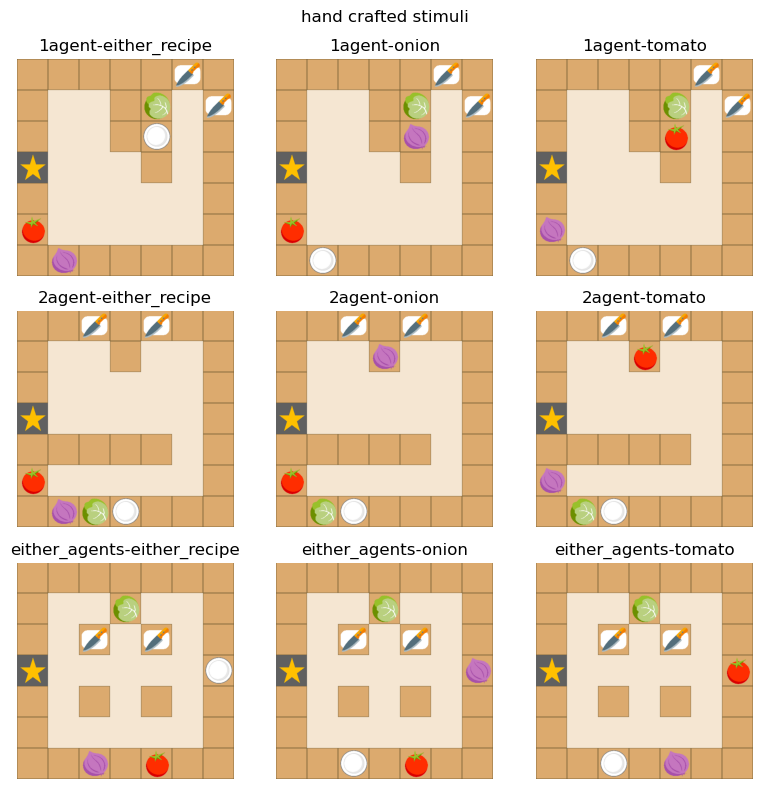

In [3]:
import matplotlib.image as mpimg

stims_dir = os.path.join(experiment_dir, 'assets', 'stims') 

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle("hand crafted stimuli")

for ax, fname in zip(axes.flatten(), sorted(os.listdir(stims_dir))):
    img_path = os.path.join(stims_dir, fname)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(os.path.splitext(fname)[0])

    plt.tight_layout()
plt.show()

## Behavioral Experiment

We recruited a convenience sample of 17 friends and family members for a short online pilot. Every participant judged the full set of nine hand-crafted kitchens in a within-subjects design, yielding 153 kitchen–observer observations. Kitchen order was shuffled for each participant.

After reading a brief tutorial and completing a comprehension check, participants advanced to the main task. Each trial displayed a static 7 × 7 floor plan on the left and two horizontal sliders on the right controlling responses to two questions:
- *How many cooks was this kitchen made for?*
- *What dish was this kitchen made for?*
<p align="center">
  <img src="../../docs/exp1/assets/instructions/4_example_trial.png" alt="System diagram" width="800">
</p>

Participants could adjust each slider freely and confirmed their choices by clicking Submit. No feedback was given. The experiment lasted ≈10 min. At the end of the experiment, participants completed a post-experiment questionnaire, where we asked for demographic information, details about their input device, subjective effort and difficulty ratings, and open-ended feedback.

#### Results

Overall, participants' correctly inferred the correct design intention for both the intended number of cooks as well as the intended recipe. Lower slider values inticate that participants responded saying the layout was intended for one cook. Higher values indicate two cooks. Overall, participants correcctly identified situations where environments were intended for one cook or two cooks. For ambiguous trials, participants were somwhat biased towards indicated two cooks:

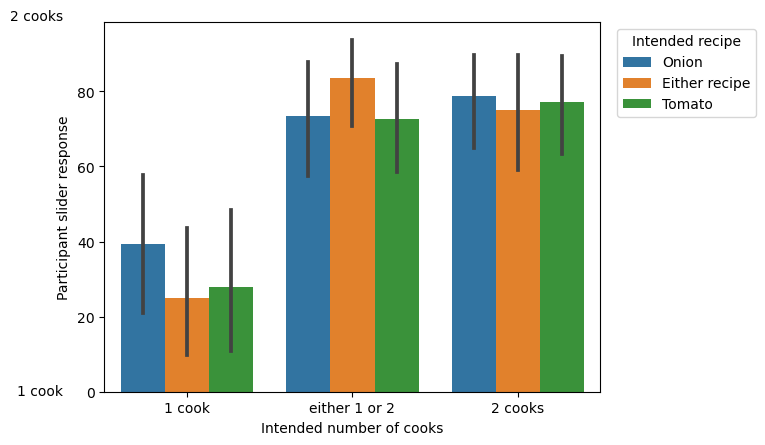

In [4]:
cooks_order = ['1agent', 'either_agents', '2agent']
dish_order = ['onion', 'either_recipe', 'tomato']
cook_map = {'1agent': '1 cook', 'either_agents': 'either 1 or 2', '2agent': '2 cooks'}
dish_map = {'onion': 'Onion', 'either_recipe': 'Either recipe', 'tomato': 'Tomato'}

ax = sns.barplot(
    data=trial_df, 
    x='true_num_agents', 
    y='slider_num_agents', 
    hue='true_recipe',
    order=cooks_order,
    hue_order=dish_order,
    errorbar='ci'
)

ax.set_ylabel("Participant slider response")
ax.set_xlabel("Intended number of cooks")
ax.set_xticklabels([cook_map[t.get_text()] for t in ax.get_xticklabels()])
ax.text(x=-0.75, y=0, s="1 cook", va="center", ha="right", fontsize=10)
ax.text(x=-0.75, y=100, s="2 cooks", va="center", ha="right", fontsize=10)

handles, labels = ax.get_legend_handles_labels()  
new_labels = [dish_map.get(lbl, lbl) for lbl in labels]  
ax.legend(
    handles=handles, 
    labels=new_labels,
    title="Intended recipe",
    loc='upper left',
    bbox_to_anchor=(1.02, 1.00)
)
plt.show()

Similarly, participants correcctly identified situations where environments were intended for one recipe over another.  Lower slider values inticate that participants responded saying the layout was intended for the tomato salad recipe. Higher values indicate onion salad. 

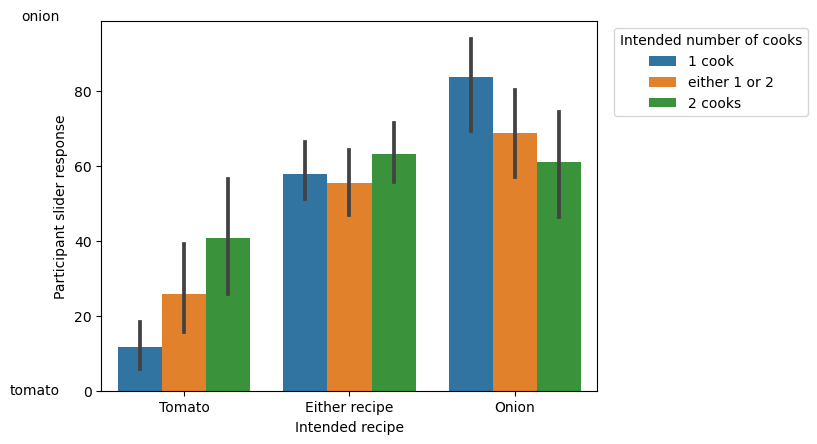

In [5]:
cooks_order = ['1agent', 'either_agents', '2agent']
dish_order = ['tomato', 'either_recipe', 'onion']
cook_map = {'1agent': '1 cook', 'either_agents': 'either 1 or 2', '2agent': '2 cooks'}
dish_map = {'onion': 'Onion', 'either_recipe': 'Either recipe', 'tomato': 'Tomato'}

ax = sns.barplot(
    data=trial_df, 
    x='true_recipe', 
    y='slider_recipe', 
    hue='true_num_agents',
    order=dish_order,
    hue_order=cooks_order,
    errorbar='ci'
)

ax.set_ylabel("Participant slider response")
ax.set_xlabel("Intended recipe")
ax.set_xticklabels([dish_map[t.get_text()] for t in ax.get_xticklabels()])
ax.text(x=-0.75, y=0, s="tomato", va="center", ha="right", fontsize=10)
ax.text(x=-0.75, y=100, s="onion", va="center", ha="right", fontsize=10)

handles, labels = ax.get_legend_handles_labels()  
new_labels = [cook_map.get(lbl, lbl) for lbl in labels]  
ax.legend(
    handles=handles, 
    labels=new_labels,
    title="Intended number of cooks",
    loc='upper left',
    bbox_to_anchor=(1.02, 1.00)
)
plt.show()

These findings are hardly suprising: it simply shows that participants were able to, for the large part, infer the intentions of an individual designer (myself), in a novel gridworld setting where the space of possible goals are known and clearly parameterized. How do they do so? Do participants rely on ad-hoc heuristics (“put all the ingredients far apart ⇒ must be two cooks”), or do they recruit a richer, utility-based theory of design that weighs how different layouts facilitate future action? 

To explore this we turn to a computational model that formalises the rational-design hypothesis: an observer should infer the design intention (team-size × recipe) under which utility is maximized--which in this case corresponds to the intention condition where timesteps to achieve the goal is minimized. In this class project, we don't actually compare this utility-maximizing model against simpler heuristic models however it may be useful in future work. 

## Computational Model

In this exploratory analysis, we leverage a model that estimates the goal-conditioned utility to explore two things:
1. manipulation check: in the hand-crafted stimuli we created, does it actually take the least timesteps to achieve the goal in the intended condition? 
2. model fit: are peoples' design inferences consistent with a model that predicts that participants infer intentions that are utility-maximizing? 

Utility was operationalised as the expected number of timesteps required to prepare and deliver a dish when agents follow a near-optimal policy. We estimated that value using the Bayesian Delegation (BD) planner introduced by Wu et al. (2021). Bayesian Delegation is a decentralized multi-agent learning mechanism that faciliatates collaboration by inferring the plans of other agents through inverse planning. 

Because each agent plans relative to a distribution over its partner’s intentions, the pair converges on efficient, collision-avoiding strategies without explicit communication. For a fixed layout and a hypothesised intention $g \in \{\text{1 cook} \times \mathbf{tomato}, \text{1 cook} \times \mathbf{onion}, \text{2 cooks} \times \mathbf{tomato}, \text{2 cooks} \times \mathbf{onion}\}$ we ran Bayesian Delegation for 20 Monte-Carlo roll-outs (due to resource limitations). 


### Manipulation check: Stimuli

We should expect that the intended goal in our stimuli would take BD the fewest timesteps to complete. To test this we compared the timesteps needed to make a dish for each design intention. We found that while layouts intended to make Tomato Salads needed less timesteps to make Tomato Salads, and vice versa for onions, this effect wasn't as strong as we hoped. 

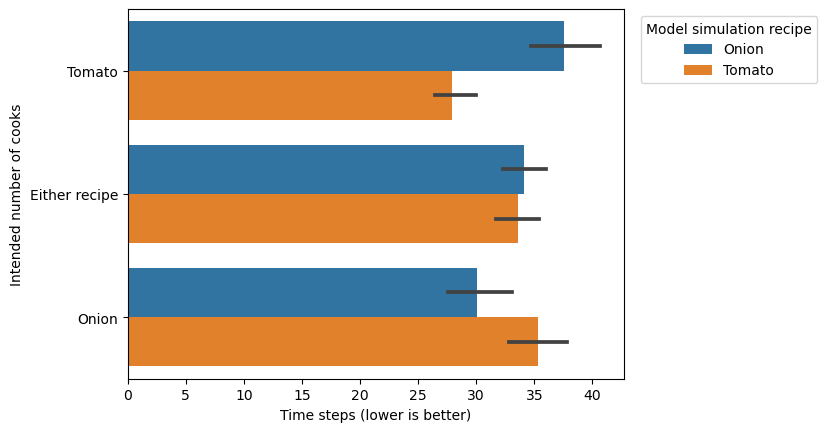

In [6]:
ax = sns.barplot(
    data=model_df, 
    x='timesteps', 
    y='intended_recipe', 
    hue='model_recipe',
    order=dish_order,
    errorbar='ci'
)

ax.set_yticklabels([dish_map[t.get_text()] for t in ax.get_yticklabels()])
handles, labels = ax.get_legend_handles_labels()  
new_labels = [dish_map.get(lbl, lbl) for lbl in labels]  
ax.legend(
    handles=handles, 
    labels=new_labels,
    title="Model simulation recipe",
    loc='upper left',
    bbox_to_anchor=(1.02, 1.00)
)


ax.set_xlabel('Time steps (lower is better)')
ax.set_ylabel('Intended number of cooks')
plt.show()

Moreover, while layouts that were intended for 2 cooks were better when 2 cooks worked in it, the reverse wasn't true when the environment was only designed for 1 cook. Perhaps this isn't suprising -- after all, the multi-agent policy where one agent is doing everything and the other agent does nothing is expected to yield identical performance to the case where there is only one agent. So unless the second agent is actively hindering the first, we shouldn't expect improved performance in that case:

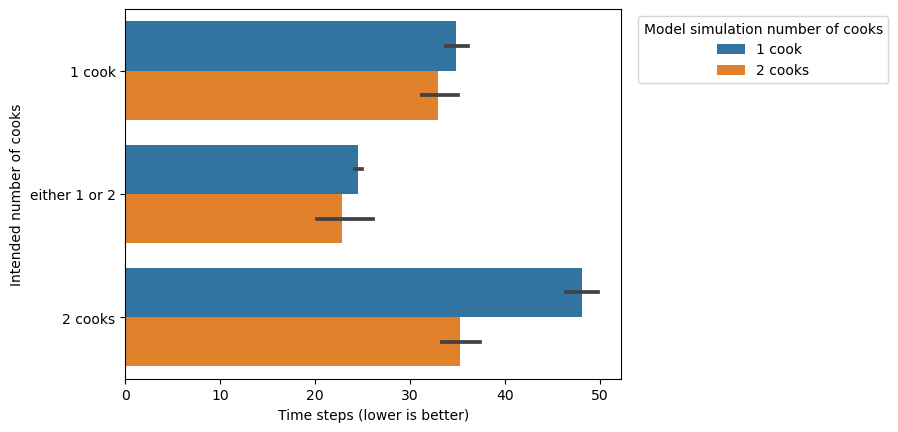

In [7]:
ax = sns.barplot(
    data=model_df, 
    x='timesteps', 
    y='intended_num_agents', 
    hue='model_num_agents',
    order=cooks_order,
    errorbar='ci'
)

ax.set_yticklabels([cook_map[t.get_text()] for t in ax.get_yticklabels()])
handles, labels = ax.get_legend_handles_labels()  
new_labels = [cook_map.get(lbl, lbl) for lbl in labels]  
ax.legend(
    handles=handles, 
    labels=new_labels,
    title="Model simulation number of cooks",
    loc='upper left',
    bbox_to_anchor=(1.02, 1.00)
)


ax.set_xlabel('Time steps (lower is better)')
ax.set_ylabel('Intended number of cooks')
plt.show()

### Model fit

For every kitchen layout $k$ the BD planner returns four cost estimates

$$
C_k(g) \qquad g \in \{\text{1 cook} \times \mathbf{tomato}, \text{1 cook} \times \mathbf{onion}, \text{2 cooks} \times \mathbf{tomato}, \text{2 cooks} \times \mathbf{onion}\}
$$

where $C_k(g)$ is the average timesteps (over 20 Monte-Carlo roll-outs) to finish the specified recipe with the specified team size in that layout. To generate slider predictions we treat each cost vector as inverse evidence for the corresponding goal and pass it through two independent soft-maxes that mirror the two questions participants answered.

The team-size slider runs from “clearly 1 cook’’ (value 0) to “clearly 2 cooks’’ (value 1). We convert costs to a probability of two cooks via 

$$
P_k(\text{2 cooks}) \;=\;
\frac{\exp\!\bigl[-\beta\,C_k(\text{2 cooks} \times\mathbf{Tomato})\bigr] \;+\;
      \exp\!\bigl[-\beta\,C_k(\text{2 cooks}\times\mathbf{Onion})\bigr]}
     {\displaystyle\sum_{g}\exp\!\bigl[-\beta\,C_k(g)\bigr]}
$$

which we then treat as the slider estimate.

Analogously, the recipe slider ranges from “Tomato-salad’’ (0) to “Onion-salad’’ (1).
The model probability of an Onion design is

$$
P_k(\mathbf{Onion}) \;=\;
\frac{\exp\!\bigl[-\beta\,C_k(1\times\mathbf{Onion})\bigr] \;+\;
      \exp\!\bigl[-\beta\,C_k(2\times\mathbf{Onion})\bigr]}
     {\displaystyle\sum_{g}\exp\!\bigl[-\beta\,C_k(g)\bigr]}
$$


which we then treat as the slider estimate.

We fit $\beta$ for each slider to maximize fit to participant slider responses (no cross validation due to pilot data sample size). 








In [8]:
import numpy as np
import pandas as pd

RECIPE_LABELS = ["tomato", "onion"]
AGENT_LABELS  = ["1agent", "2agent"]

def pred_matrix(beta, g):
    """Return 2×2 posterior matrix for one layout at inverse-temperature β."""
    mean_cost = (
        g.groupby(["model_num_agents", "model_recipe"])
         .timesteps.mean()
         .unstack("model_recipe")
         .reindex(index=AGENT_LABELS, columns=RECIPE_LABELS)
    )
    util = np.exp(-beta * mean_cost)
    return util / util.values.sum()

def build_lookup(beta, model_df):
    """Return dict keyed by (recipe,num_agents) → (pred_agents,pred_recipe)."""
    records = {}
    for _, g in model_df.groupby("intention"):
        post = pred_matrix(beta, g)
        key  = (g.intended_recipe.iloc[0], g.intended_num_agents.iloc[0])
        records[key] = (
            post.loc["2agent"].sum() * 100,   # P(two-cooks) → 0-100 slider
            post["onion"].sum()    * 100      # P(onion)     → 0-100 slider
        )
    return records

def corr_at_beta(beta, model_df, trial_df, col_human, idx):
    lookup = build_lookup(beta, model_df)
    preds  = trial_df.set_index(["true_recipe", "true_num_agents"]).index.map(
        lambda k: lookup[k][idx]
    )
    return trial_df[col_human].corr(pd.Series(preds, index=trial_df.index))

beta_grid = np.logspace(-3, 1, 200)

best_beta_agents, best_r_agents = max(
    ((b, corr_at_beta(b, model_df, trial_df, "slider_num_agents", 0))
     for b in beta_grid),
    key=lambda t: t[1]
)

best_beta_recipe, best_r_recipe = max(
    ((b, corr_at_beta(b, model_df, trial_df, "slider_recipe", 1))
     for b in beta_grid),
    key=lambda t: t[1]
)

print(f"best β (agents)  = {best_beta_agents:.4f}   r = {best_r_agents:.3f}   r^2 = {best_r_agents**2*100:.1f}")
print(f"best β (recipe)  = {best_beta_recipe:.4f}   r = {best_r_recipe:.3f}   r^2 = {best_r_recipe**2*100:.1f}")

agents_lookup  = build_lookup(best_beta_agents,  model_df)
recipe_lookup  = build_lookup(best_beta_recipe,  model_df)

trial_df["model_agents_slider_pred"] = trial_df.set_index(
    ["true_recipe", "true_num_agents"]
).index.map(lambda k: agents_lookup[k][0])

trial_df["model_recipe_slider_pred"] = trial_df.set_index(
    ["true_recipe", "true_num_agents"]
).index.map(lambda k: recipe_lookup[k][1])

dup_cols = [c for c in trial_df.columns if c.endswith(("_x", "_y")) or c.startswith("intended_")]
trial_df.drop(columns=dup_cols, inplace=True, errors="ignore")

best β (agents)  = 0.0140   r = 0.252   r^2 = 6.4
best β (recipe)  = 0.0010   r = 0.312   r^2 = 9.7


As we can see, we fit quite poorly to participant slider responses: our model explains 6.4% of the variance in the agent slider and 9.7% in the recipe intention response. Future work should refine this method of model prediction.

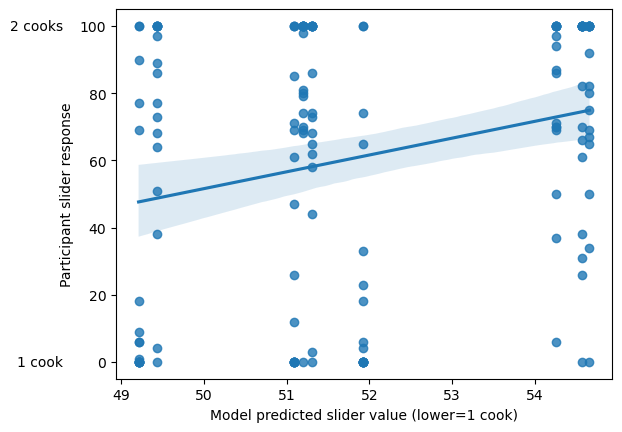

In [9]:
ax = sns.regplot(data=trial_df, x='model_agents_slider_pred', y='slider_num_agents')
ax.set_xlabel('Model predicted slider value (lower=1 cook)')
ax.set_ylabel("Participant slider response")
ax.text(x=48.3, y=0, s="1 cook", va="center", ha="right", fontsize=10)
ax.text(x=48.3, y=100, s="2 cooks", va="center", ha="right", fontsize=10)

plt.show()

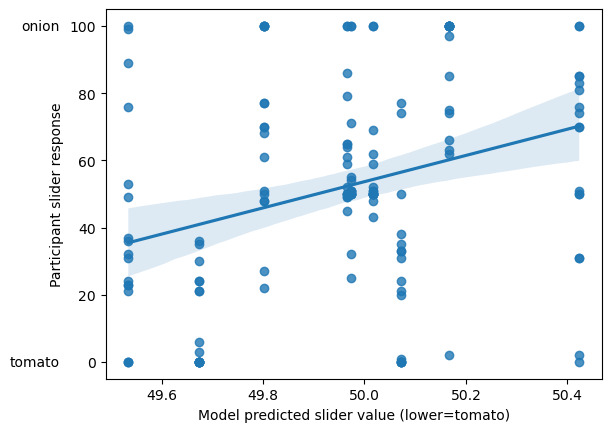

In [10]:
ax = sns.regplot(data=trial_df, x='model_recipe_slider_pred', y='slider_recipe')
ax.set_xlabel('Model predicted slider value (lower=tomato)')
ax.set_ylabel("Participant slider response")
ax.text(x=49.4, y=0, s="tomato", va="center", ha="right", fontsize=10)
ax.text(x=49.4, y=100, s="onion", va="center", ha="right", fontsize=10)

plt.show()


## Discussion

The present pilot asked whether people can read design intent straight from a spatial layout, and whether those inferences reflect an implicit assumption that good environments maximize task utility. Using a stripped-down Overcooked kitchen, participants saw nothing more than a 7 × 7 floor plan yet reliably identified both whom the space was tuned for and which salad it favored. This replicates everyday experience: observers effortlessly glean that a baker’s bench differs in purpose from a dinner-service line.

When we compared human slider settings with posterior probabilities derived from the Bayesian Delegation  planner, however, correspondence was modest. With a single parameter $
\beta$, BD explained roughly 6 – 10 % of the variance in the data. Several factors likely contribute.

First, our implementation of Bayesian Delegation requires us to specify the agents’ start locations for every simulation. In each layout, we hand-picked an (informally) ideal start location for both the single-agent and two-agent settings, mirroring how the layouts themselves were hand-designed. Alternatively, the agents’ start positions could have been randomly generated. Insofar as participants used a similar mental-simulation process to estimate the utility of each design intent, their assumed starts were likely somewhere in between (neither optimal nor random), which would strongly influence the model’s predicted utilities. Future work should examine the impact of start location on model fit and introduce stochastic sampling to start locations.

Second, participants saw only one example animation and thus had limited experience with the Overcooked environment. Informal conversations revealed that many did not understand multiplayer mechanisms—such as passing ingredients across the counter. Providing a short practice block in which participants play a few levels could align their internal simulations more closely with the planner’s capabilities.

Third, we relied on a convenience sample of 17 people who were generally familiar with the project. This, combined with a small stimulus set (nine judgments per person), produced high variance. Future studies should recruit a larger, platform-based sample and automatically generate kitchens—using evolutionary search or differentiable simulators (e.g., Allen et al., 2022)—to ensure the stimulus set spans the full space of model predictions.

The present work tackles only one piece of the environment-design loop: inferring intention from layout. A complete account must also explain generation—how people rearrange space to serve their own goals—and communication—how designers deliberately make layouts legible to others. Future work aims to explore this further by examining environment design with similar approaches seen in inverse inverse graphics. 


## Code and experiment availablility

Code and data is is available at https://github.com/justintheyang/design-inference.

A demo of the experiment is available here: https://justintheyang.github.io/design-inference/exp1/

## References

Alexander, C. (1977). A pattern language: towns, buildings, construction. *Oxford university press*.

Kirsh, D. (1995). The intelligent use of space. *Artificial intelligence*, 73(1-2), 31-68.

Kirsh, D., & Maglio, P. (1994). On distinguishing epistemic from pragmatic action. *Cognitive science*, 18(4), 513-549.

Forsblad, M. (2016). Distributed Cognition in Home Environments The Prospective Memory and Cognitive Practices of Older Adults. Linkopings Universitet (Sweden).

Shafto, P., Goodman, N. D., & Griffiths, T. L. (2014). A rational account of pedagogical reasoning: Teaching by, and learning from, examples. *Cognitive psychology*, 71, 55-89.

Vélez, N., Chen, A. M., Burke, T., Cushman, F. A., & Gershman, S. J. (2023). Teachers recruit mentalizing regions to represent learners’ beliefs. *Proceedings of the National Academy of Sciences*, 120(22), e2215015120.

Wu, S. A., Wang, R. E., Evans, J. A., Tenenbaum, J. B., Parkes, D. C., & Kleiman‐Weiner, M. (2021). Too many cooks: Bayesian inference for coordinating multi‐agent collaboration. *Topics in Cognitive Science*, 13(2), 414-432.

Allen, K. R., Lopez-Guevara, T., Stachenfeld, K., Sanchez-Gonzalez, A., Battaglia, P., Hamrick, J., & Pfaff, T. (2022). Physical design using differentiable learned simulators. *arXiv preprint* arXiv:2202.00728.